In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_final=pd.read_csv("final_data_set.csv")

In [3]:
df_final

,Unnamed: 0,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,...,Year1,Year,State Name,County Name,Business_category,Employment,Firms,Establishments,DAMAGE_PROPERTY_NUM,days
0,0,FM-5423-CO,5423,CO,FM,2021-12-30 00:00:00+00:00,2022,Fire,MARSHALL FIRE,0,...,2021,2021,Colorado,Boulder,Airports & Air Transport,117,22,22,5.502520e+05,8.0
1,1,FM-5423-CO,5423,CO,FM,2021-12-30 00:00:00+00:00,2022,Fire,MARSHALL FIRE,0,...,2021,2021,Colorado,Boulder,Hospitals & Healthcare Facilities,13279,2420,2465,5.099234e+05,8.0
2,2,FM-5423-CO,5423,CO,FM,2021-12-30 00:00:00+00:00,2022,Fire,MARSHALL FIRE,0,...,2021,2021,Colorado,Boulder,Power Plants (Electricity Generation & Distrib...,675,51,51,9.365519e+05,8.0
3,3,FM-5423-CO,5423,CO,FM,2021-12-30 00:00:00+00:00,2022,Fire,MARSHALL FIRE,0,...,2021,2021,Colorado,Boulder,Water Treatment & Utilities,177,35,35,1.253395e+06,8.0
4,4,FM-5422-TX,5422,TX,FM,2021-12-15 00:00:00+00:00,2022,Fire,NORTH 207 FIRE,0,...,2021,2021,Texas,Carson,Airports & Air Transport,21,4,4,2.712627e+05,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21957,21957,FM-5162-SC,5162,SC,FM,2016-11-12 00:00:00+00:00,2017,Fire,PINNACLE MOUNTAIN FIRE,0,...,2017,2016,South Carolina,Greenville,Power Plants (Electricity Generation & Distrib...,459,30,30,6.483666e+05,38.0
21958,21958,FM-5162-SC,5162,SC,FM,2016-11-12 00:00:00+00:00,2017,Fire,PINNACLE MOUNTAIN FIRE,0,...,2017,2016,South Carolina,Greenville,Water Treatment & Utilities,213,40,40,8.331346e+05,38.0
21959,21959,FM-5162-SC,5162,SC,FM,2016-11-12 00:00:00+00:00,2017,Fire,PINNACLE MOUNTAIN FIRE,0,...,2017,2016,South Carolina,Pickens,Airports & Air Transport,11,4,4,5.944935e+05,38.0
21960,21960,FM-5162-SC,5162,SC,FM,2016-11-12 00:00:00+00:00,2017,Fire,PINNACLE MOUNTAIN FIRE,0,...,2017,2016,South Carolina,Pickens,Hospitals & Healthcare Facilities,2075,245,245,8.737752e+05,38.0


In [4]:
# Compute total disasters per county and year
total_disasters_per_county_year = df_final.groupby(["County Name", "Year"]).size()

# Compute incidents of each type per county and year
incident_counts_year = df_final.groupby(["County Name", "Year", "incidentType"]).size()

# Function to calculate probability with year included
def calculate_probability(row):
    county = row["County Name"]
    disaster_type = row["incidentType"]
    year = row['Year']
    
    # Get count of that specific disaster type in the county and year
    disaster_count = incident_counts_year.get((county, year, disaster_type), 0)
    
    # Get total number of incidents in the county and year
    total_county_incidents = total_disasters_per_county_year.get((county, year), 0)
    
    # Avoid division by zero if total_county_incidents is zero
    if total_county_incidents == 0:
        return 0
    
    # Compute probability
    return disaster_count / total_county_incidents

# Apply function to each row
df_final["Probability_of_incident"] = df_final.apply(calculate_probability, axis=1)


In [5]:
df_final['incidentType'].unique()

array(['Fire', 'Tornado', 'Severe Storm', 'Hurricane', 'Flood',
       'Severe Ice Storm', 'Snowstorm', 'Mud/Landslide', 'Earthquake',
       'Coastal Storm'], dtype=object)

In [6]:
import pandas as pd
import numpy as np

# Define business types and hazards
business_types = ["Airports & Air Transport", "Hospitals & Healthcare Facilities", 
                  "Power Plants (Electricity Generation & Distribution)", "Water Treatment & Utilities"]
hazards = ["Fire", "Hurricane", "Severe Storm", "Flood", "Tornado", "Snowstorm", 
           "Severe Ice Storm", "Mud/Landslide", "Coastal Storm", "Earthquake"]

# Define time steps (in hours)
time_steps = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]

# Define states
states = ['Full', 'Partial', 'Non-Operational']
years = [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]
counties = [
    13, 65, 139, 485, 83, 103, 89, 29, 77, 7, 17, 105, 47, 37, 35, 43, 69, 87, 61, 1, 3, 5, 63, 111, 93, 9,
    21, 25, 27, 59, 31, 71, 49, 55, 97, 107, 67, 33, 57, 19, 115, 41, 53, 39, 75, 85, 99, 81, 45, 95, 113, 131,
    153, 11, 170, 197, 90, 73, 51, 119, 243, 179, 253, 233, 125, 15, 299, 151, 163, 135, 167, 145, 155, 121, 133, 195,
    23, 161, 101, 79, 117, 147, 122, 211, 215, 219, 141, 143, 157, 177, 183, 217, 227, 91, 123, 127, 129, 137, 149, 159,
    109, 189, 199, 175, 185, 173, 181, 187, 241, 311, 165, 225, 235, 237, 239, 193, 203, 205, 231, 169, 207, 223, 267,
    279, 281, 283, 287, 297, 305, 307, 315, 317, 319, 329, 333, 341, 343, 353, 357, 369, 371, 375, 379, 381, 385, 387,
    389, 391, 399, 405, 413, 425, 427, 433, 435, 437, 445, 449, 463, 475, 487, 495, 501, 503, 505, 507, 171, 201, 209,
    213, 221, 245, 247, 249, 251, 255, 257, 259, 265, 273, 277, 285, 289, 291, 293, 303, 309, 313, 321, 323, 325, 331,
    337, 339, 347, 349, 351, 355, 361, 363, 365, 367, 373, 395, 397, 401, 403, 407, 409, 415, 419, 423, 429, 439, 441,
    451, 453, 455, 457, 459, 465, 467, 469, 471, 473, 477, 479, 481, 489, 491, 493, 497, 499, 100, 110, 230, 229, 191,
    186, 510, 20, 590, 640, 690, 520, 620, 650, 700, 760, 770, 830, 271, 261, 275, 269, 295, 86, 550, 710, 740, 800,
    810, 600, 610, 630, 683, 685, 840, 16, 483, 447, 12, 50, 180, 263, 530, 540, 570, 580, 595, 660, 670, 678, 680, 720,
    730, 735, 750, 775, 790, 820
]

# Define the transition probabilities for each hazard (decay rate)
hazard_decay = {
    "Fire": 0.02, "Hurricane": 0.03, "Severe Storm": 0.03, "Flood": 0.04,
    "Tornado": 0.05, "Snowstorm": 0.02, "Severe Ice Storm": 0.03,
    "Mud/Landslide": 0.04, "Coastal Storm": 0.03, "Earthquake": 0.06
}

# Function to simulate the Markov Chain transition with enhanced recovery from Non-Operational to Full
def simulate_markov_chain_with_recovery(initial_state, hazard, time_steps):
    # Initial probabilities based on the starting state
    if initial_state == 'Full':
        full_op = 0.9
        partial_op = 0.1
        non_op = 0.0
    elif initial_state == 'Partial':
        full_op = 0.5
        partial_op = 0.4
        non_op = 0.1
    else:
        full_op = 0.0
        partial_op = 0.2
        non_op = 0.8

    decay_rate = hazard_decay[hazard]
    transition_probs = []
    simulated_states = [initial_state]

    for t in time_steps[1:]:
        # Adjust decay rate dynamically over 120 time steps, ensuring positive probabilities
        dynamic_decay = max(0.05, decay_rate * (1 + (t / 120)))  # Prevent negative or too small decay
        full_op -= dynamic_decay
        full_op = max(full_op, 0.05)  # Ensure it never goes below 0.05
        non_op += dynamic_decay
        non_op = min(non_op, 0.95)  # Ensure it doesn't exceed 0.95
        partial_op = 1 - (full_op + non_op)

        # Introduce a deterministic recovery from Non-Operational to Full after 72 hours
        if non_op > 0.7 and t >= 72:  # If more than 70% of the system is non-operational after 72 hours
            recovery_prob = 0.9  # 90% chance of recovery
            if np.random.rand() < recovery_prob:  # If recovery is triggered
                full_op = min(1, full_op + 0.5)  # Increase Full state probability by 50%
                non_op = max(0, non_op - 0.5)  # Decrease Non-Operational state by 50%

        # Transition probabilities based on the calculated values
        transition_probs.append({
            'Full': max(full_op, 0.05),  # Ensure no negative or zero probability
            'Partial': max(partial_op, 0.05),  # Ensure no negative or zero probability
            'Non-Operational': max(non_op, 0.05)  # Ensure no negative or zero probability
        })

        # Determine the next state based on the maximum probability
        if full_op > partial_op and full_op > non_op:
            simulated_states.append('Full')
        elif partial_op > full_op and partial_op > non_op:
            simulated_states.append('Partial')
        else:
            simulated_states.append('Non-Operational')

    return simulated_states, transition_probs

# Store the results in a list
transition_data = []

# Run simulations for each business, hazard, county, and year
for business in business_types:
    for hazard in hazards:
        for county in counties:  # Using your provided counties
            for year in years:  # Using your provided years
                for initial_state in states:
                    # Simulate transitions for each initial state over time steps
                    simulated_states, transition_probs = simulate_markov_chain_with_recovery(initial_state, hazard, time_steps)
                    
                    # Store the results with transition probabilities for each state transition
                    for time, state, prob in zip(time_steps, simulated_states, transition_probs):
                        # For each time step, capture transitions from each state to each other state
                        for to_state in states:
                            from_state = initial_state
                            transition_prob = prob.get(to_state, 0.05)  # Use 0.05 if zero
                            transition_data.append({
                                'Business_category': business,
                                'Hazard': hazard,
                                'County': county,
                                'Year': year,
                                'From State': from_state,
                                'To State': to_state,
                                'Hour': time,
                                'Probability': transition_prob
                            })

# Convert the transition data into a DataFrame
df_markov = pd.DataFrame(transition_data)

# Example: Show the first few rows of the DataFrame
df_markov


,Business_category,Hazard,County,Year,From State,To State,Hour,Probability
0,Airports & Air Transport,Fire,13,2021,Full,Full,0,0.850
1,Airports & Air Transport,Fire,13,2021,Full,Partial,0,0.100
2,Airports & Air Transport,Fire,13,2021,Full,Non-Operational,0,0.050
3,Airports & Air Transport,Fire,13,2021,Full,Full,12,0.800
4,Airports & Air Transport,Fire,13,2021,Full,Partial,12,0.100
...,...,...,...,...,...,...,...,...
8380795,Water Treatment & Utilities,Earthquake,820,2014,Non-Operational,Partial,96,0.050
8380796,Water Treatment & Utilities,Earthquake,820,2014,Non-Operational,Non-Operational,96,0.274
8380797,Water Treatment & Utilities,Earthquake,820,2014,Non-Operational,Full,108,0.606
8380798,Water Treatment & Utilities,Earthquake,820,2014,Non-Operational,Partial,108,0.050


In [7]:
df_markov = df_markov[ df_markov['From State'] != df_markov['To State'] ]
df_markov["Transition"] = df_markov["From State"] + " to " + df_markov["To State"]
df_markov.drop(columns=["From State", "To State"], inplace=True)


C:\Users\yesub\AppData\Local\Temp\ipykernel_31360\3003639386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_markov["Transition"] = df_markov["From State"] + " to " + df_markov["To State"]
C:\Users\yesub\AppData\Local\Temp\ipykernel_31360\3003639386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_markov.drop(columns=["From State", "To State"], inplace=True)


In [8]:
df_markov["Probability"].value_counts().reset_index().sort_values(by="Probability",ascending=True)

,Probability,count
0,0.050,1561060
56,0.050,18624
99,0.055,9312
79,0.066,9312
95,0.084,9312
...,...,...
133,0.810,903
146,0.875,92
147,0.910,91
145,0.930,97


In [9]:
df_prob=df_markov.rename(columns={'County':'fipsCountyCode','Hazard':'incidentType'})
df_prob

,Business_category,incidentType,fipsCountyCode,Year,Hour,Probability,Transition
1,Airports & Air Transport,Fire,13,2021,0,0.100,Full to Partial
2,Airports & Air Transport,Fire,13,2021,0,0.050,Full to Non-Operational
4,Airports & Air Transport,Fire,13,2021,12,0.100,Full to Partial
5,Airports & Air Transport,Fire,13,2021,12,0.100,Full to Non-Operational
7,Airports & Air Transport,Fire,13,2021,24,0.100,Full to Partial
...,...,...,...,...,...,...,...
8380792,Water Treatment & Utilities,Earthquake,820,2014,84,0.050,Non-Operational to Partial
8380794,Water Treatment & Utilities,Earthquake,820,2014,96,0.726,Non-Operational to Full
8380795,Water Treatment & Utilities,Earthquake,820,2014,96,0.050,Non-Operational to Partial
8380797,Water Treatment & Utilities,Earthquake,820,2014,108,0.606,Non-Operational to Full


In [10]:
df_prob[df_prob['Probability']==0.0]

,Business_category,incidentType,fipsCountyCode,Year,Hour,Probability,Transition


In [11]:
# Ensure minimum probability threshold
df_prob['Probability'] = df_prob['Probability'].apply(lambda x: max(x, 0.05))

# Pivot to wide format and assign back to df_prob
df_prob = df_prob.pivot_table(
    index=[col for col in df_prob.columns if col not in ['Transition', 'Probability']],
    columns='Transition',
    values='Probability',
    aggfunc='sum',  # or 'mean' if appropriate
    fill_value=0
).reset_index()

# Optional cleanup of column names
df_prob.columns.name = None
df_prob.columns = [str(col) for col in df_prob.columns]


In [12]:
df_prob

,Business_category,incidentType,fipsCountyCode,Year,Hour,Full to Non-Operational,Full to Partial,Non-Operational to Full,Non-Operational to Partial,Partial to Full,Partial to Non-Operational
0,Airports & Air Transport,Coastal Storm,1,2014,0,0.050,0.1,0.050,0.10,0.450,0.150
1,Airports & Air Transport,Coastal Storm,1,2014,12,0.100,0.1,0.050,0.05,0.400,0.200
2,Airports & Air Transport,Coastal Storm,1,2014,24,0.150,0.1,0.050,0.05,0.350,0.250
3,Airports & Air Transport,Coastal Storm,1,2014,36,0.200,0.1,0.050,0.05,0.300,0.300
4,Airports & Air Transport,Coastal Storm,1,2014,48,0.250,0.1,0.050,0.05,0.250,0.350
...,...,...,...,...,...,...,...,...,...,...,...
931195,Water Treatment & Utilities,Tornado,840,2021,60,0.405,0.1,0.550,0.05,0.095,0.505
931196,Water Treatment & Utilities,Tornado,840,2021,72,0.490,0.1,0.465,0.05,0.050,0.590
931197,Water Treatment & Utilities,Tornado,840,2021,84,0.580,0.1,0.375,0.05,0.050,0.680
931198,Water Treatment & Utilities,Tornado,840,2021,96,0.675,0.1,0.780,0.05,0.550,0.275


In [13]:
df_prob["Non-Operational to Partial"].value_counts().reset_index().sort_values(by="Non-Operational to Partial",ascending=True)

,Non-Operational to Partial,count
0,0.050,838080
2,0.084,9312
3,0.095,9312
1,0.100,74496


In [14]:
# Convert both columns to string type
df_final['incidentType'] = df_final['incidentType'].astype(str)
df_prob['incidentType'] = df_prob['incidentType'].astype(str)

# Perform the merge
df_merged = pd.merge(df_final, df_prob, 
                     on=['fipsCountyCode','Year','incidentType', 'Business_category'], 
                     how='left')


In [15]:
df_merged.columns

Index(['Unnamed: 0', 'femaDeclarationString', 'disasterNumber', 'state',
       'declarationType', 'declarationDate', 'fyDeclared', 'incidentType',
       'declarationTitle', 'ihProgramDeclared', 'iaProgramDeclared',
       'paProgramDeclared', 'hmProgramDeclared', 'incidentBeginDate',
       'incidentEndDate', 'disasterCloseoutDate', 'tribalRequest',
       'fipsStateCode', 'fipsCountyCode', 'placeCode', 'designatedArea',
       'declarationRequestNumber', 'lastIAFilingDate', 'incidentId', 'region',
       'designatedIncidentTypes', 'lastRefresh', 'hash', 'id', 'Year1', 'Year',
       'State Name', 'County Name', 'Business_category', 'Employment', 'Firms',
       'Establishments', 'DAMAGE_PROPERTY_NUM', 'days',
       'Probability_of_incident', 'Hour', 'Full to Non-Operational',
       'Full to Partial', 'Non-Operational to Full',
       'Non-Operational to Partial', 'Partial to Full',
       'Partial to Non-Operational'],
      dtype='object')

In [16]:
df_merged['hours']=df_merged['days']*24
df_merged['hours']=df_merged['hours'].fillna(120)
df_merged=df_merged[df_merged['Hour']<=df_merged['hours']]


In [18]:
df_merged.groupby(['County Name','incidentType']).size().reset_index(name='Count').sort_values(by='Count')

,County Name,incidentType,Count
842,Cleveland,Tornado,1
3084,Pike,Tornado,1
3070,Phillips,Tornado,1
699,Carroll,Tornado,1
1617,Guthrie,Severe Storm,1
...,...,...,...
2248,Lee,Hurricane,541
1925,Jackson,Hurricane,584
2482,Marion,Hurricane,612
2899,Orange,Hurricane,618


C:\Users\yesub\AppData\Local\Temp\ipykernel_31360\1971287366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged.groupby(['County Name','incidentType']).size().reset_index(name='Count')['Count'])


<Axes: xlabel='Count', ylabel='Density'>

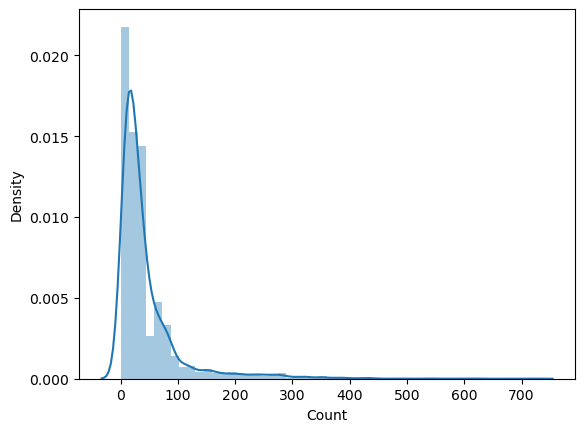

In [21]:
sns.distplot(df_merged.groupby(['County Name','incidentType']).size().reset_index(name='Count')['Count'])

In [22]:
df_merged.groupby(['County Name', "incidentType",'Year']).size().reset_index(name='Count').sort_values(by=['County Name', "incidentType",'Year'],ascending=False)[:30]

,County Name,incidentType,Year,Count
6631,Ziebach,Severe Storm,2017,5
6630,Ziebach,Flood,2019,20
6629,Zavala,Severe Ice Storm,2021,20
6628,Zapata,Severe Ice Storm,2021,20
6627,Zapata,Hurricane,2020,10
6626,ZIEBACH,Flood,2014,10
6625,ZAVALA,Severe Storm,2015,10
6624,Yuba,Severe Storm,2017,30
6623,Yuba,Flood,2017,30
6622,Yuba,Fire,2020,90


In [24]:
df_merged["DAMAGE_PROPERTY_NUM"].value_counts().reset_index(name='Count').sort_values(by='Count',ascending=False)

,DAMAGE_PROPERTY_NUM,Count
0,0.000000e+00,5192
9825,2.531075e+05,10
9827,6.043758e+05,10
9828,8.579391e+05,10
9829,9.131185e+05,10
...,...,...
20951,7.551124e+05,1
20952,1.011727e+06,1
20953,8.270612e+04,1
20954,7.381947e+05,1


In [26]:
df_merged["Probability_of_incident"].value_counts().reset_index(name='Count').sort_values(by='Probability_of_incident',ascending=True)

,Probability_of_incident,Count
155,0.020000,7
153,0.033333,10
158,0.041667,1
147,0.043478,20
151,0.045455,10
...,...,...
38,0.900000,296
22,0.909091,531
86,0.916667,110
51,0.952381,198


In [27]:
df_merged["Partial to Non-Operational"].value_counts().reset_index(name='Count').sort_values(by='Partial to Non-Operational',ascending=True)

,Partial to Non-Operational,Count
0,0.150,21591
22,0.155,327
32,0.166,44
1,0.200,21073
25,0.215,244
17,0.228,2787
34,0.238,23
2,0.250,17616
10,0.252,3457
31,0.275,62


In [28]:
df_merged["DAMAGE_PROPERTY_NUM"]=df_merged["DAMAGE_PROPERTY_NUM"]/1000000

C:\Users\yesub\AppData\Local\Temp\ipykernel_31360\3973116682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Probability_of_incident'])


<Axes: xlabel='Probability_of_incident', ylabel='Density'>

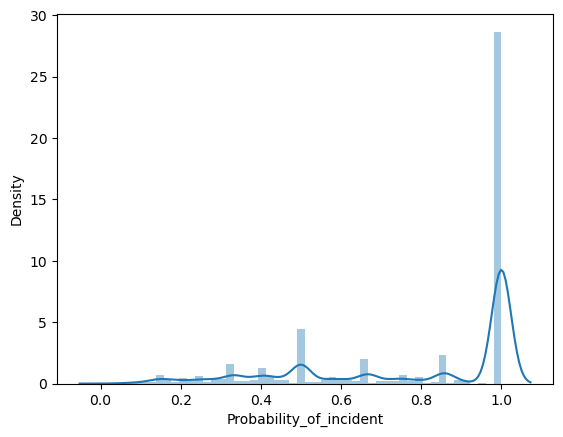

In [29]:
sns.distplot(df_merged['Probability_of_incident'])

C:\Users\yesub\AppData\Local\Temp\ipykernel_31360\3432345488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Partial to Non-Operational'])


<Axes: xlabel='Partial to Non-Operational', ylabel='Density'>

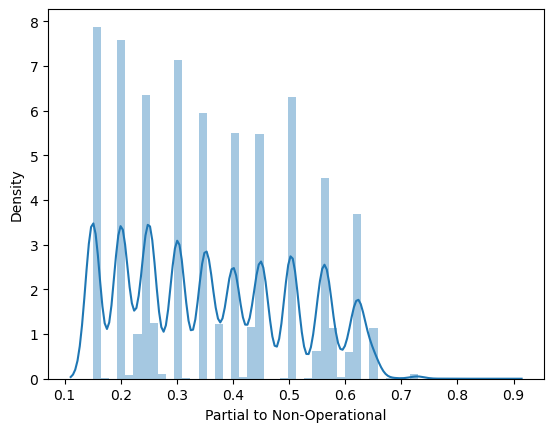

In [30]:
sns.distplot(df_merged['Partial to Non-Operational'])

C:\Users\yesub\AppData\Local\Temp\ipykernel_31360\165315153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['DAMAGE_PROPERTY_NUM'])


<Axes: xlabel='DAMAGE_PROPERTY_NUM', ylabel='Density'>

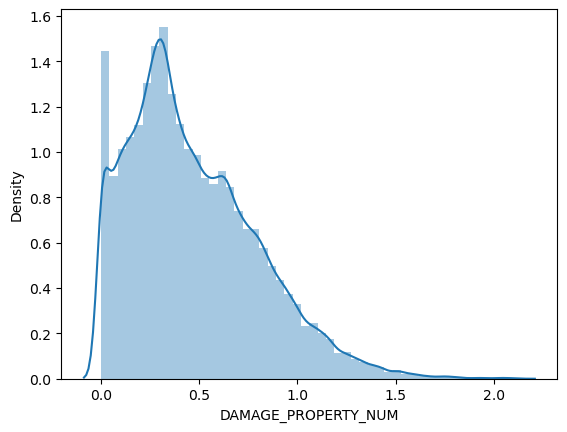

In [31]:
sns.distplot(df_merged['DAMAGE_PROPERTY_NUM'])

In [32]:

df_merged['Risk_PN'] = df_merged['DAMAGE_PROPERTY_NUM'] * df_merged['Partial to Non-Operational'] * df_merged['Probability_of_incident']

# Calculate Risk_NF (Risk for Non-Operational to Full)
df_merged['Risk_NF'] = df_merged['DAMAGE_PROPERTY_NUM'] * df_merged['Non-Operational to Full'] * df_merged['Probability_of_incident']

# Calculate Risk_PF (Risk for Partial to Full)
df_merged['Risk_PF'] = df_merged['DAMAGE_PROPERTY_NUM'] * df_merged['Partial to Full'] * df_merged['Probability_of_incident']

# Calculate Risk_NP (Risk for Non-Operational to Partial)
df_merged['Risk_NP'] = df_merged['DAMAGE_PROPERTY_NUM'] * df_merged['Non-Operational to Partial'] * df_merged['Probability_of_incident']

# Calculate Risk_FN (Risk for Full to Non-Operational)
df_merged['Risk_FN'] = df_merged['DAMAGE_PROPERTY_NUM'] * df_merged['Full to Non-Operational'] * df_merged['Probability_of_incident']

# Calculate Risk_FP (Risk for Full to Partial)
df_merged['Risk_FP'] = df_merged['DAMAGE_PROPERTY_NUM'] * df_merged['Full to Partial'] * df_merged['Probability_of_incident']

# Display the updated DataFrame with risk columns
print(df_merged[['County Name', 'incidentType', 'Risk_PN', 'Risk_NF', 'Risk_PF', 'Risk_NP', 'Risk_FN', 'Risk_FP']].head())


  County Name incidentType   Risk_PN   Risk_NF   Risk_PF   Risk_NP   Risk_FN  \
0     Boulder         Fire  0.082538  0.027513  0.247613  0.055025  0.027513   
1     Boulder         Fire  0.110050  0.027513  0.220101  0.027513  0.055025   
2     Boulder         Fire  0.137563  0.027513  0.192588  0.027513  0.082538   
3     Boulder         Fire  0.165076  0.027513  0.165076  0.027513  0.110050   
4     Boulder         Fire  0.192588  0.027513  0.137563  0.027513  0.137563   

    Risk_FP  
0  0.055025  
1  0.055025  
2  0.055025  
3  0.055025  
4  0.055025  


C:\Users\yesub\AppData\Local\Temp\ipykernel_31360\2593760219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Risk_PN'])


<Axes: xlabel='Risk_PN', ylabel='Density'>

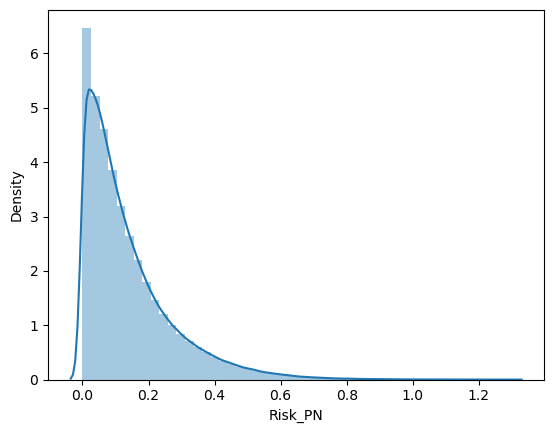

In [33]:
sns.distplot(df_merged['Risk_PN'])

In [34]:
df_merged['Risk_PN'].value_counts().reset_index(name='Count').sort_values(by='Risk_PN',ascending=True)

,Risk_PN,Count
0,0.000000,5192
11955,0.000004,1
11956,0.000005,1
11957,0.000006,1
11958,0.000007,1
...,...,...
55238,1.220933,1
55173,1.248910,1
106149,1.274005,1
88898,1.275876,1


In [35]:
df_merged.shape

(191792, 54)

In [63]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

# Define the columns to transform
risk_cols = ['Risk_PN', 'Risk_NF', 'Risk_PF', 'Risk_NP', 'Risk_FN', 'Risk_FP']

# Step 1: Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_merged[risk_cols] = pt.fit_transform(df_merged[risk_cols])

# Step 2: Scale the transformed data to 0-1
scaler = MinMaxScaler()
df_merged[risk_cols] = scaler.fit_transform(df_merged[risk_cols])


In [73]:
import pandas as pd

# Assuming you already have a DataFrame called df
# Calculate skewness for the specified columns
columns_of_interest = ['Risk_PN', 'Risk_NF', 'Risk_PF', 'Risk_NP', 'Risk_FN', 'Risk_FP']
skewness_values = df_merged[columns_of_interest].skew()

print(skewness_values)


Risk_PN    0.213889
Risk_NF    0.612745
Risk_PF    0.310329
Risk_NP    0.193664
Risk_FN    0.294715
Risk_FP    0.158711
dtype: float64


C:\Users\yesub\AppData\Local\Temp\ipykernel_41376\2593760219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Risk_PN'])


<Axes: xlabel='Risk_PN', ylabel='Density'>

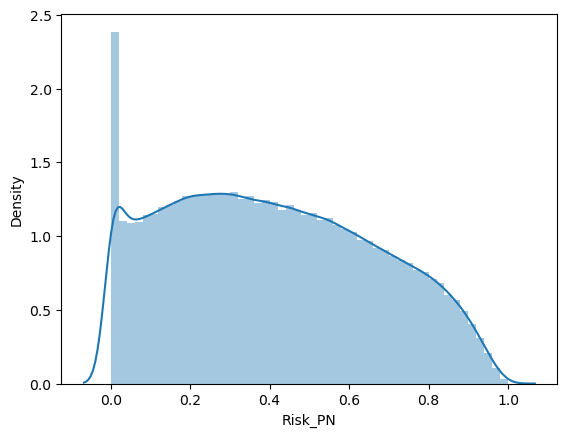

In [62]:
sns.distplot(df_merged['Risk_PN'])

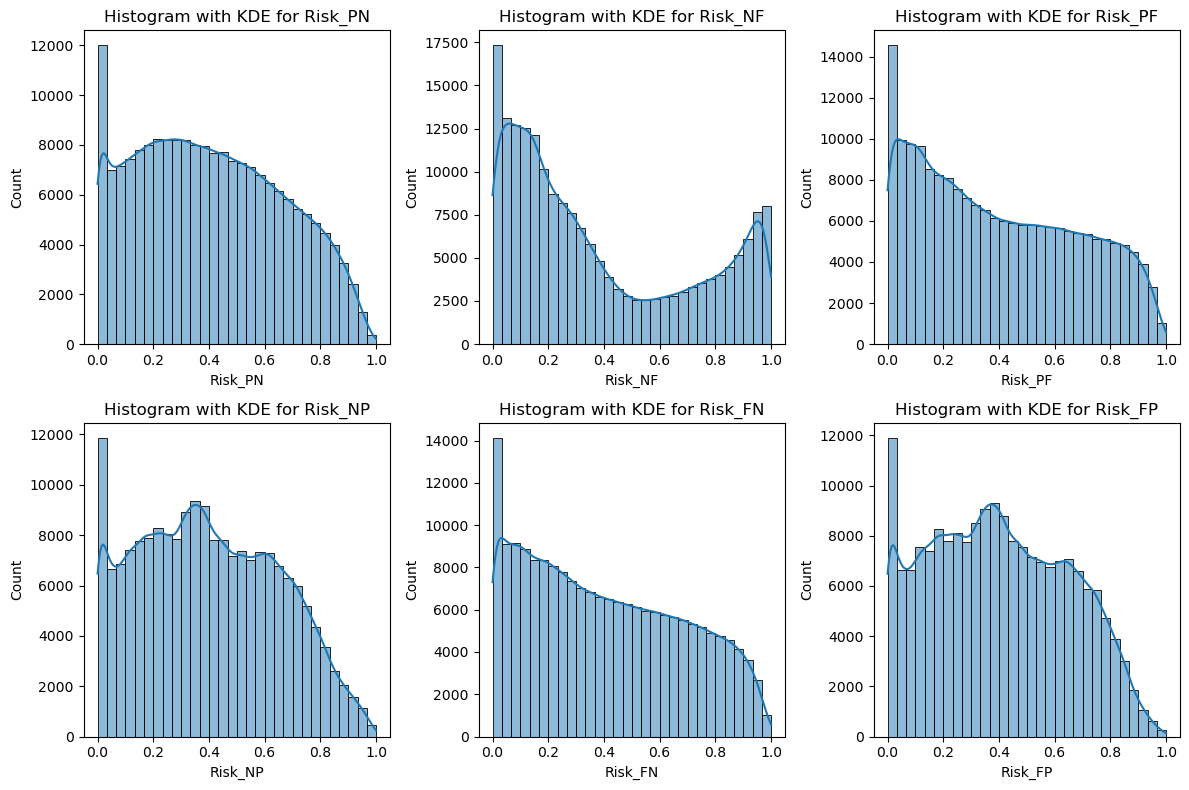

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of your features
features = ['Risk_PN', 'Risk_NF', 'Risk_PF', 'Risk_NP', 'Risk_FN', 'Risk_FP']

# Plot each feature's histogram with KDE
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_merged[feature], kde=True, bins=30)
    plt.title(f'Histogram with KDE for {feature}')
plt.tight_layout()
plt.show()


In [71]:
df_merged['Risk_PN'].value_counts()

Risk_PN
0.000000    5192
0.343937       1
0.731373       1
0.708008       1
0.740681       1
            ... 
0.089635       1
0.200361       1
0.256396       1
0.307890       1
0.216714       1
Name: count, Length: 186601, dtype: int64

In [69]:
model_training_dataset=df_merged[['femaDeclarationString', 'disasterNumber', 'state',
       'declarationType', 'declarationDate','incidentBeginDate','incidentType',
       'incidentEndDate','fipsStateCode', 'fipsCountyCode','Year','Hour',
       'State Name', 'County Name','Business_category', 'Employment', 'Firms',
       'Establishments', 'DAMAGE_PROPERTY_NUM', 'days','Full to Partial', 'Full to Non-Operational', 'Partial to Full',
       'Partial to Non-Operational', 'Non-Operational to Full',
       'Non-Operational to Partial','Probability_of_incident','Risk_PN', 'Risk_NF', 'Risk_PF', 'Risk_NP', 'Risk_FN', 'Risk_FP']]

In [71]:
model_training_dataset.to_csv('model_training_dataset.csv')

In [72]:
df_merged['fipsCountyCode'].unique()

array([ 13,  65, 139, 485,  83, 103,  89,  29,  77,   7,  17, 105,  47,
        37,  35,  43,  69,  87,  61,   1,   3,   5,  63, 111,  93,   9,
        21,  25,  27,  59,  31,  71,  49,  55,  97, 107,  67,  33,  57,
        19, 115,  41,  53,  39,  75,  85,  99,  81,  45,  95, 113, 131,
       153,  11, 170, 197,  90,  73,  51, 119, 243, 179, 253, 233, 125,
        15, 299, 151, 163, 135, 167, 145, 155, 121, 133, 195,  23, 161,
       101,  79, 117, 147, 122, 211, 215, 219, 141, 143, 157, 177, 183,
       217, 227,  91, 123, 127, 129, 137, 149, 159, 109, 189, 199, 175,
       185, 173, 181, 187, 241, 311, 165, 225, 235, 237, 239, 193, 203,
       205, 231, 169, 207, 223, 267, 279, 281, 283, 287, 297, 305, 307,
       315, 317, 319, 329, 333, 341, 343, 353, 357, 369, 371, 375, 379,
       381, 385, 387, 389, 391, 399, 405, 413, 425, 427, 433, 435, 437,
       445, 449, 463, 475, 487, 495, 501, 503, 505, 507, 171, 201, 209,
       213, 221, 245, 247, 249, 251, 255, 257, 259, 265, 273, 27